In [1]:
#Import library
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#Atur input gambar
IMAGE_SIZE = [2400, 1400]
BATCH_SIZE = 16

In [3]:
#Buat direktori
import os

base_dir = 'C:/Users/akip/Desktop/vgg16/daun jeruk/'
# Membuat direktori
os.makedirs(base_dir, exist_ok=True)

# Menampilkan isi dari direktori
print(os.listdir(base_dir))

['data', 'latih', 'validasi']


In [4]:
import os 
#menentukan direktorinya
data_dir = os.path.join(base_dir, 'data')
train_dir = os.path.join(base_dir, 'latih')
validation_dir = os.path.join(base_dir, 'validasi')

In [5]:
import os

data_dir = "C:\\Users\\akip\\Desktop\\vgg16\\daun jeruk\\data"  

CVPD_dir = os.path.join(data_dir, 'CVPD/')
kankerjeruk_dir = os.path.join(data_dir, 'kankerjeruk/')
ulatpeliang_dir = os.path.join(data_dir, 'ulatpeliang/')

# Uncomment the following line
# print("Jumlah Data Latih di Tiap Kelas")
print("Jumlah Gambar penyakit CVPD        = ", len(os.listdir(CVPD_dir)))
print("Jumlah Gambar penyakit_kanker_jeruk        = ", len(os.listdir(kankerjeruk_dir)))
print("Jumlah Gambar ulatpeliang        = ", len(os.listdir(ulatpeliang_dir)))


Jumlah Gambar penyakit CVPD        =  55
Jumlah Gambar penyakit_kanker_jeruk        =  56
Jumlah Gambar ulatpeliang        =  38


In [6]:
#Direktori isi latih
train_CVPD = os.path.join(train_dir, 'CVPD/')
train_kankerjeruk = os.path.join(train_dir, 'kankerjeruk/')
train_ulatpeliang = os.path.join(train_dir, 'ulatpeliang/')

#Direktori isi uji
validation_CVPD = os.path.join(validation_dir, 'CVPD/')
validation_kankerjeruk = os.path.join(validation_dir, 'kankerjeruk/')
validation_ulatpeliang = os.path.join(validation_dir, 'ulatpeliang/')

In [7]:
# Membagi dataset
import os
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
    total_size = len(os.listdir(source))
    train_size = int(train_ratio * total_size)
    val_size = total_size - train_size

    randomized = random.sample(os.listdir(source), total_size)
    train_files = randomized[0:train_size]
    val_files = randomized[train_size:total_size]

    # Ensure the destination directories exist
    os.makedirs(train, exist_ok=True)
    os.makedirs(val, exist_ok=True)

    for i in train_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(train, i.replace('\\', '/'))  # Replace backslashes
        copyfile(i_file, destination)

    for i in val_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(val, i.replace('\\', '/'))  # Replace backslashes
        copyfile(i_file, destination)

# Jumlah pembagian data latih dan uji
train_ratio = 0.8

# Pembagian latih dan uji
source_00 = CVPD_dir
train_00 = train_CVPD
val_00 = validation_CVPD
train_val_split(source_00, train_00, val_00, train_ratio)

source_01 = kankerjeruk_dir
train_01 = train_kankerjeruk
val_01 = validation_kankerjeruk
train_val_split(source_01, train_01, val_01, train_ratio)

source_02 = ulatpeliang_dir
train_02 = train_ulatpeliang
val_02 = validation_ulatpeliang
train_val_split(source_02, train_02, val_02, train_ratio)


In [8]:
print("Jumlah Train CVPD        = ", len(os.listdir(train_CVPD)))
print("Jumlah Train kankerjeruk        = ", len(os.listdir(train_kankerjeruk)))
print("Jumlah Train ulatpeliang        = ", len(os.listdir(train_ulatpeliang)))

print('=======================================================================================')

print("Jumlah Validation CVPD        = ", len(os.listdir(validation_CVPD)))
print("Jumlah Validation kankerjeruk        = ", len(os.listdir(validation_kankerjeruk)))
print("Jumlah Validation ulatpeliang        = ", len(os.listdir(validation_ulatpeliang)))


Jumlah Train CVPD        =  55
Jumlah Train kankerjeruk        =  56
Jumlah Train ulatpeliang        =  38
Jumlah Validation CVPD        =  11
Jumlah Validation kankerjeruk        =  12
Jumlah Validation ulatpeliang        =  8


In [9]:
#Download pre-trained model VGG16
vgg = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=max,
    classes=1000,
    classifier_activation="softmax",
)
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)      │      1,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)      │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)      │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)     │     73,856 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)     │    147,584 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)       │    295,168 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)       │    590,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)       │    590,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)       │  1,180,160 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 25088)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ fc1 (Dense)                     │ (None, 4096)              │ 102,764,5… │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ fc2 (Dense)                     │ (None, 4096)              │ 16,781,312 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ predictions (Dense)             │ (None, 1000)              │  4,097,000 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
vgg.input

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=None, name=keras_tensor>

In [11]:
#Buat parameter sebelumnya tidak dilatih lagi
for layer in vgg.layers:
  layer.trainable = False
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)      │      1,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)      │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)      │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)     │     73,856 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)     │    147,584 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)       │    295,168 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)       │    590,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)       │    590,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)       │  1,180,160 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 25088)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ fc1 (Dense)                     │ (None, 4096)              │ 102,764,5… │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ fc2 (Dense)                     │ (None, 4096)              │ 16,781,312 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ predictions (Dense)             │ (None, 1000)              │  4,097,000 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 138,357,544 (527.79 MB)

In [12]:
from keras.models import Model
from keras.layers import Dense

# Mengambil output dari layer sebelum layer prediksi 1000
x = vgg.layers[-2].output

# Membuat layer prediksi baru dengan 15 unit dan nama 'prediction'
predictions = Dense(15, activation='softmax', name='prediksi')(x)

# Membuat model baru
model = Model(inputs=vgg.input, outputs=predictions)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)      │      1,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)      │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)      │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)     │     73,856 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)     │    147,584 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)       │    295,168 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)       │    590,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)       │    590,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)       │  1,180,160 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 25088)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ fc1 (Dense)                     │ (None, 4096)              │ 102,764,5… │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ fc2 (Dense)                     │ (None, 4096)              │ 16,781,312 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ prediksi (Dense)                │ (None, 15)                │     61,455 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 134,321,999 (512.40 MB)

 Trainable params: 61,455 (240.06 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

In [13]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

val_set = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)



Found 149 images belonging to 3 classes.
Found 31 images belonging to 3 classes.


In [14]:
import tensorflow as tf
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)      │      1,792 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)      │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)      │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)     │     73,856 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)     │    147,584 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)       │    295,168 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)       │    590,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)       │    590,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)       │  1,180,160 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)       │  2,359,808 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 25088)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ fc1 (Dense)                     │ (None, 4096)              │ 102,764,5… │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ fc2 (Dense)                     │ (None, 4096)              │ 16,781,312 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ prediksi (Dense)                │ (None, 15)                │     61,455 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 134,321,999 (512.40 MB)

 Trainable params: 61,455 (240.06 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Assuming you have a Sequential model
model = Sequential()
# Add your model layers here

# Example: Adding VGG16 base
from tensorflow.keras.applications import VGG16
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.add(vgg_base)
model.add(GlobalAveragePooling2D())

# Make sure the output layer has the correct number of units for your classification task
num_classes = 15
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with sparse categorical crossentropy
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Assuming you are using an ImageDataGenerator for data augmentation
BATCH_SIZE = 32
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# # Assuming your data is organized in directories for different classes
train_set = train_datagen.flow_from_directory('C:/Users/akip/Desktop/vgg16/daun jeruk/latih', target_size=(224, 224), batch_size=BATCH_SIZE, class_mode='sparse')
val_set = val_datagen.flow_from_directory('C:/Users/akip/Desktop/vgg16/daun jeruk/validasi', target_size=(224, 224), batch_size=BATCH_SIZE, class_mode='sparse')

# Train your model
history = model.fit(
    train_set,
    batch_size=BATCH_SIZE,
    validation_data=val_set,
    verbose=1,
    epochs=20,
)


Found 149 images belonging to 3 classes.
Found 31 images belonging to 3 classes.
Epoch 1/20


C:\Users\akip\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 61s 10s/step - accuracy: 0.2176 - loss: 9.2642 - val_accuracy: 0.3548 - val_loss: 1.5754
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 53s 10s/step - accuracy: 0.2660 - loss: 1.9100 - val_accuracy: 0.3871 - val_loss: 1.7170
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 53s 10s/step - accuracy: 0.2979 - loss: 1.5419 - val_accuracy: 0.3871 - val_loss: 1.1286
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 53s 10s/step - accuracy: 0.4128 - loss: 1.2019 - val_accuracy: 0.3548 - val_loss: 1.2230
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 53s 11s/step - accuracy: 0.3888 - loss: 1.1809 - val_accuracy: 0.3548 - val_loss: 1.1085
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 53s 10s/step - accuracy: 0.3486 - loss: 1.1220 - val_accuracy: 0.3548 - val_loss: 1.1545
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 54s 11s/step - accuracy: 0.3788 - loss: 1.2245 - val_accuracy: 0.3871 - val_loss: 1.1716
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 60s 11s/step - accuracy: 0.3818 - loss: 1.1412 - val_accuracy: 0.3548 - val_loss: 1.1011
Epoch 9/20


In [26]:
# Save the trained model
# model.save('mymodel_updated.h5')

# Save model architecture to JSON
model_json = model.to_json()
with open("mymodel_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights to HDF5
model.save_weights("mymodel_weights.h5")

ValueError: The filename must end in `.weights.h5`. Received: filepath=mymodel_weights.h5

In [27]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint  # Note: Change the import statement

# Assuming you have already defined and compiled your Keras model, let's call it 'model'
# For example:
# model = ...

# Define the checkpoint callback
checkpoint = ModelCheckpoint(filepath='mymodel_weights.h5', verbose=2, save_best_only=True)

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=mymodel_weights.h5

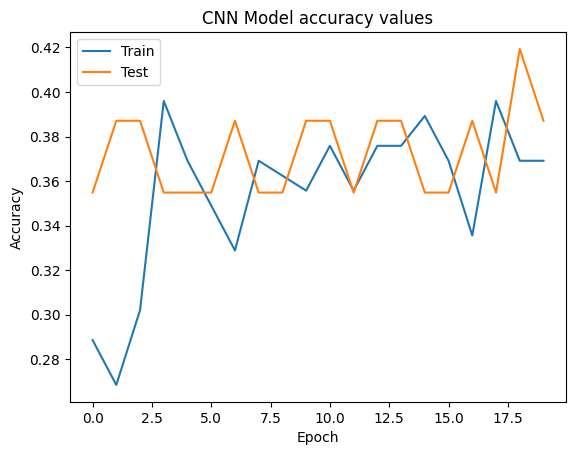

In [28]:
# Plot Akurasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input

# Load your pre-trained model
model = load_model('mymodel.h5')

# Print the summary to see the input shape expected by the model
model.summary()

# Example: If the input shape is incorrect, update it
new_input_shape = (new_height, new_width, channels)  # Update with your new input shape
new_input_layer = Input(shape=new_input_shape, name='new_input')

# Replace the input layer with the new input layer
model.layers[0] = new_input_layer

# Now, you can save the updated model
model.save('updated_model.h5')


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'mymodel.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [30]:
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog, Canvas, PhotoImage, Label
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

# Load your pre-trained model
# model = load_model('mymodel.h5')
model = load_model('mymodel.h5', compile=False, input_shape=(224, 224, 3))


# Memastikan model sudah dilatih dan siap digunakan
assert model is not None, "Model belum diinisialisasi."

# Membuka file dialog untuk memilih gambar
root = Tk()
root.withdraw()  # we don't want a full GUI, so keep the root window from appearing
path = filedialog.askopenfilename(title="Pilih Gambar")  # show an "Open" dialog box and return the path to the selected file

# Prediksi
img = image.load_img(path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)  # Apply preprocessing specific to the VGG16 model

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print("Nama file gambar:", path)

class_list = ["Penyakit CVPD", "Penyakit kanker jeruk", "Penyakit ulat peliang"]  # Daftar kelas

predicted_class = np.argmax(classes[0])  # Mengambil indeks dengan nilai probabilitas tertinggi

print("Gambar ini diprediksi sebagai", class_list[predicted_class])

# Buat Tkinter window dan tampilkan gambar
root = Tk()
root.title("Hasil Prediksi")

# Tambahkan Canvas untuk menampilkan gambar
canvas = Canvas(root, width=224, height=224)
canvas.pack()

# Tampilkan gambar di Canvas
photo = PhotoImage(file=path)
canvas.create_image(0, 0, anchor="nw", image=photo)

# Tampilkan hasil prediksi
result_label = Label(root, text=f"Gambar ini diprediksi sebagai {class_list[predicted_class]}")
result_label.pack()

root.mainloop()


TypeError: load_model() got an unexpected keyword argument 'input_shape'